In [0]:
!pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
URL = 'http://www.faengrv.com.br/gdg/poker-hand.data'
dataframe = pd.read_csv(URL)
dataframe.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [0]:
print(dataframe.__format__)

<built-in method __format__ of DataFrame object at 0x7f7f3103e2e8>


In [0]:
ds = dataframe.reset_index(drop=True)

In [0]:
train, test = train_test_split(ds, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [0]:
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

16006 train examples
4002 validation examples
5002 test examples


In [0]:
##print(train)

In [0]:
x_train=train.iloc[:, 0:10]
y_train=train.iloc[:,10]

y_test=test.iloc[:, 10]
x_test=test.iloc[:, 0:10]

In [0]:
##print(y_train)

In [0]:
inputs = keras.Input(shape=(10,)) 

In [0]:
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs,outputs=predictions)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
history = model.fit(x_train,
                   y_train,
                   epochs=350,
                   verbose=1,
                   batch_size=1000,
                   validation_data=(x_test,y_test))

In [0]:
model.evaluate(x_test,y_test)

5002/5002 [==============================] - 0s 35us/sample - loss: 0.7919 - accuracy: 0.6675


[0.791896048854323, 0.667533]

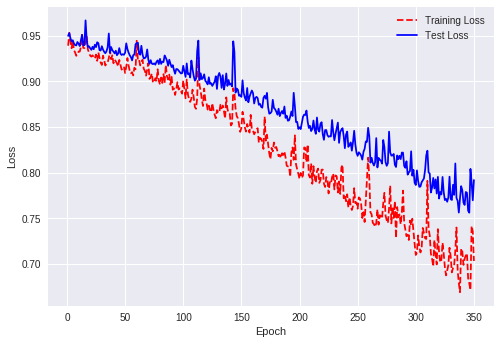

In [0]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

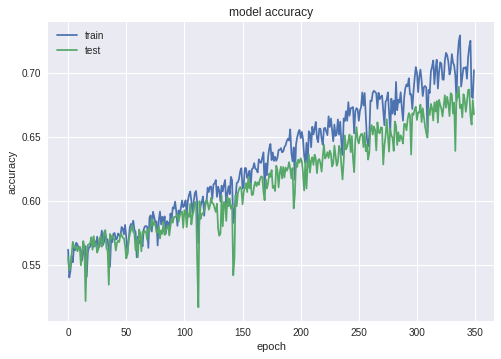

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()